# # Task 1: Exploratory Data Analysis and Data Preprocessing
# ##  Load the data

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from pathlib import Path
import warnings
import random
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

def smart_sample_csv(file_path, sample_size=100000, random_seed=42):
    """
    Smart sampling: Either takes first N rows or random sample
    depending on file size
    """
    print(f"Sampling data from {file_path}...")
    
    # First, get total rows (without loading entire file)
    print("Counting total rows...")
    with open(file_path, 'r', encoding='utf-8') as f:
        total_rows = sum(1 for _ in f) - 1  # Subtract header
    
    print(f"Total rows in CSV: {total_rows:,}")
    
    if total_rows <= sample_size * 2:
        # If file isn't too large, load full dataset
        print("Loading full dataset...")
        df = pd.read_csv(file_path, low_memory=False)
    elif total_rows <= sample_size * 10:
        # Load first N rows
        print(f"Loading first {sample_size} rows...")
        df = pd.read_csv(file_path, nrows=sample_size, low_memory=False)
    else:
        # For very large files, take random sample
        print(f"Taking random sample of {sample_size} rows...")
        # Skip rows to get random sample
        skip = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))
        df = pd.read_csv(file_path, skiprows=skip, low_memory=False)
    
    return df, total_rows

# Load data with smart sampling
data_path = '../data/raw/complaints.csv'
df, total_rows = smart_sample_csv(data_path, sample_size=100000)

print(f"\nSample dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Sampling rate: {len(df)/total_rows*100:.2f}%")

# Display basic information
print("\n=== SAMPLE DATA INFO ===")
df.info()

print("\n=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== DESCRIPTIVE STATISTICS ===")
display(df.describe(include='all'))

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100)
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
display(missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False))

Sampling data from ../data/raw/complaints.csv...
Counting total rows...
Total rows in CSV: 17,536,785
Taking random sample of 100000 rows...

Sample dataset shape: (54463, 18)
Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?', 'Complaint ID']
Sampling rate: 0.31%

=== SAMPLE DATA INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54463 entries, 0 to 54462
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 54463 non-null  object
 1   Product                       54463 non-null  object
 2   Sub-product                   53128 non-null  object
 3   Issue                         54463 no

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Debt collection,I do not know,Written notification about debt,Notification didn't disclose it was an attempt...,NaN,NaN,Experian Information Solutions Inc.,PA,17601,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196060
1,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,94544,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196073
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,Experian Information Solutions Inc.,PA,19139,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196368
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NY,10467,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14196960
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,91752,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14197119



=== DESCRIPTIVE STATISTICS ===


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,54463,54463,53128,54463,49648,16930,27270,54463,54152,54285,3543,45175,54463,54463,54463,54463,4379,5.446300e+04
unique,4446,21,81,157,244,14862,11,1432,57,10253,3,4,7,4349,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,193,27446,39372,20408,13183,122,25544,13280,7351,1009,2219,26282,51190,188,31069,54042,3536,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.100764e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.778245e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.390000e+02
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.022084e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.469694e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.130706e+07



=== MISSING VALUES ===


,Missing_Count,Missing_Percentage
Tags,50920,93.494666
Consumer disputed?,50084,91.959679
Consumer complaint narrative,37533,68.914676
Company public response,27193,49.929310
Consumer consent provided?,9288,17.053780
Sub-issue,4815,8.840864
Sub-product,1335,2.451205
State,311,0.571030
ZIP code,178,0.326827


# ## 1. Initial Data Exploration

In [19]:
# Check for narrative column

narrative_cols = [col for col in df.columns if 'narrative' in col.lower() or 'complaint' in col.lower()]
print(f"Narrative columns found: {narrative_cols}")

if narrative_cols:
    narrative_col = narrative_cols[0]
    print(f"Using narrative column: '{narrative_col}'")
    
    # Check for missing narratives
    missing_narratives = df[narrative_col].isna().sum()
    total_rows = len(df)
    print(f"\nMissing narratives: {missing_narratives:,} ({missing_narratives/total_rows*100:.1f}%)")
    print(f"Total rows: {total_rows:,}")

# Check for product column
product_cols = [col for col in df.columns if 'product' in col.lower()]
print(f"Product columns found: {product_cols}")

if product_cols:
    product_col = product_cols[0]
    print(f"\nUsing product column: '{product_col}'")
    
    # Display unique products
    unique_products = df[product_col].nunique()
    print(f"Unique products: {unique_products}")
    
    # Display top 10 products
    print("\nTop 10 product categories:")
    print(df[product_col].value_counts().head(10))

Narrative columns found: ['Consumer complaint narrative', 'Complaint ID']
Using narrative column: 'Consumer complaint narrative'

Missing narratives: 37,533 (68.9%)
Total rows: 54,463
Product columns found: ['Product', 'Sub-product']

Using product column: 'Product'
Unique products: 21

Top 10 product categories:
Product
Credit reporting or other personal consumer reports                             27446
Credit reporting, credit repair services, or other personal consumer reports    12193
Debt collection                                                                  4529
Mortgage                                                                         2410
Checking or savings account                                                      1617
Credit card                                                                      1308
Credit card or prepaid card                                                      1150
Money transfer, virtual currency, or money service                         

# ## 2. Product Distribution Analysis

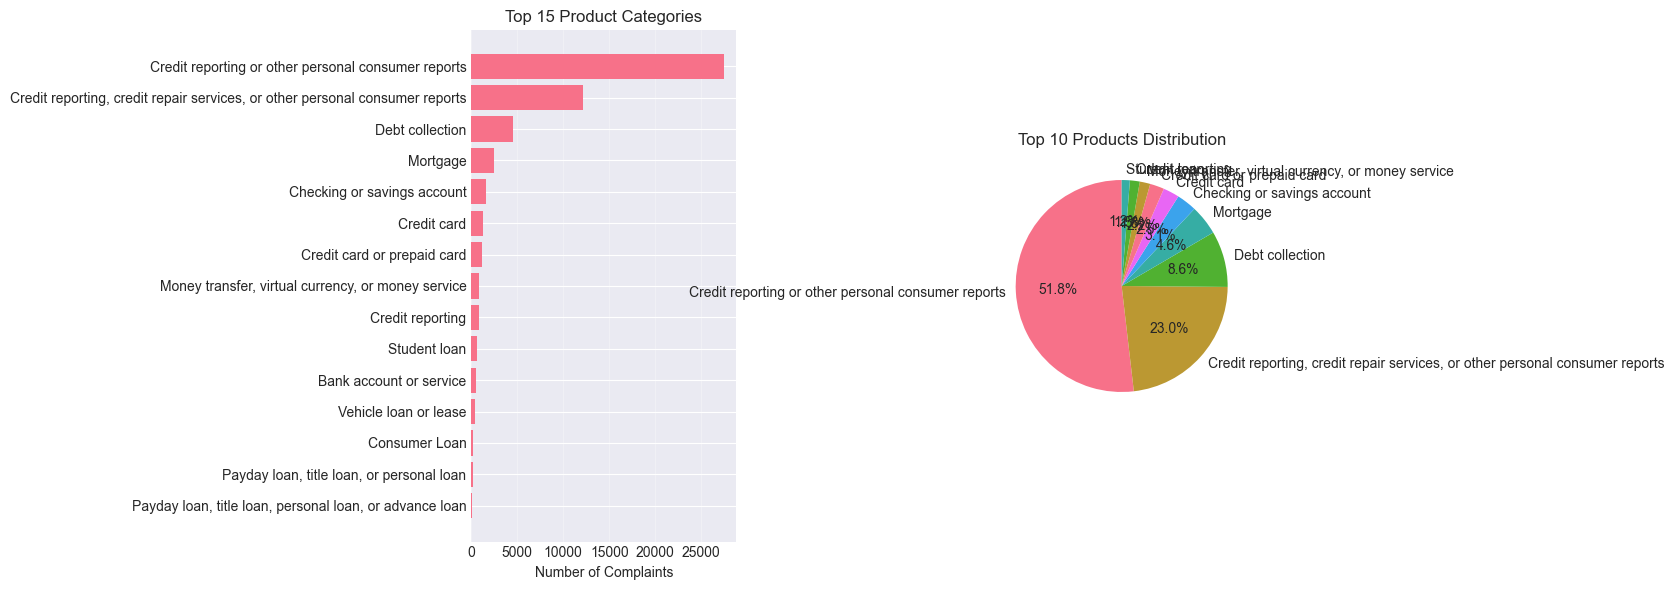

In [20]:
if product_cols:
    product_col = product_cols[0]
    
    # Get product distribution
    product_dist = df[product_col].value_counts()
    
    # Plot top 15 products
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Horizontal bar chart
    top_15 = product_dist.head(15)
    ax1.barh(top_15.index[::-1], top_15.values[::-1])
    ax1.set_xlabel('Number of Complaints')
    ax1.set_title('Top 15 Product Categories')
    ax1.grid(axis='x', alpha=0.3)
    
    # Pie chart for top 10
    top_10 = product_dist.head(10)
    ax2.pie(top_10.values, labels=top_10.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Top 10 Products Distribution')
    
    plt.tight_layout()
    plt.show()

# ## 3. Narrative Length Analysis

Narrative Statistics:
Total complaints: 54,463
With narratives: 16,930 (31.1%)
Without narratives: 37,533 (68.9%)

Length Statistics (characters):
Minimum: 0
Maximum: 31,559
Average: 310
Median: 0

Word Count Statistics:
Minimum: 0
Maximum: 5,617
Average: 54
Median: 0


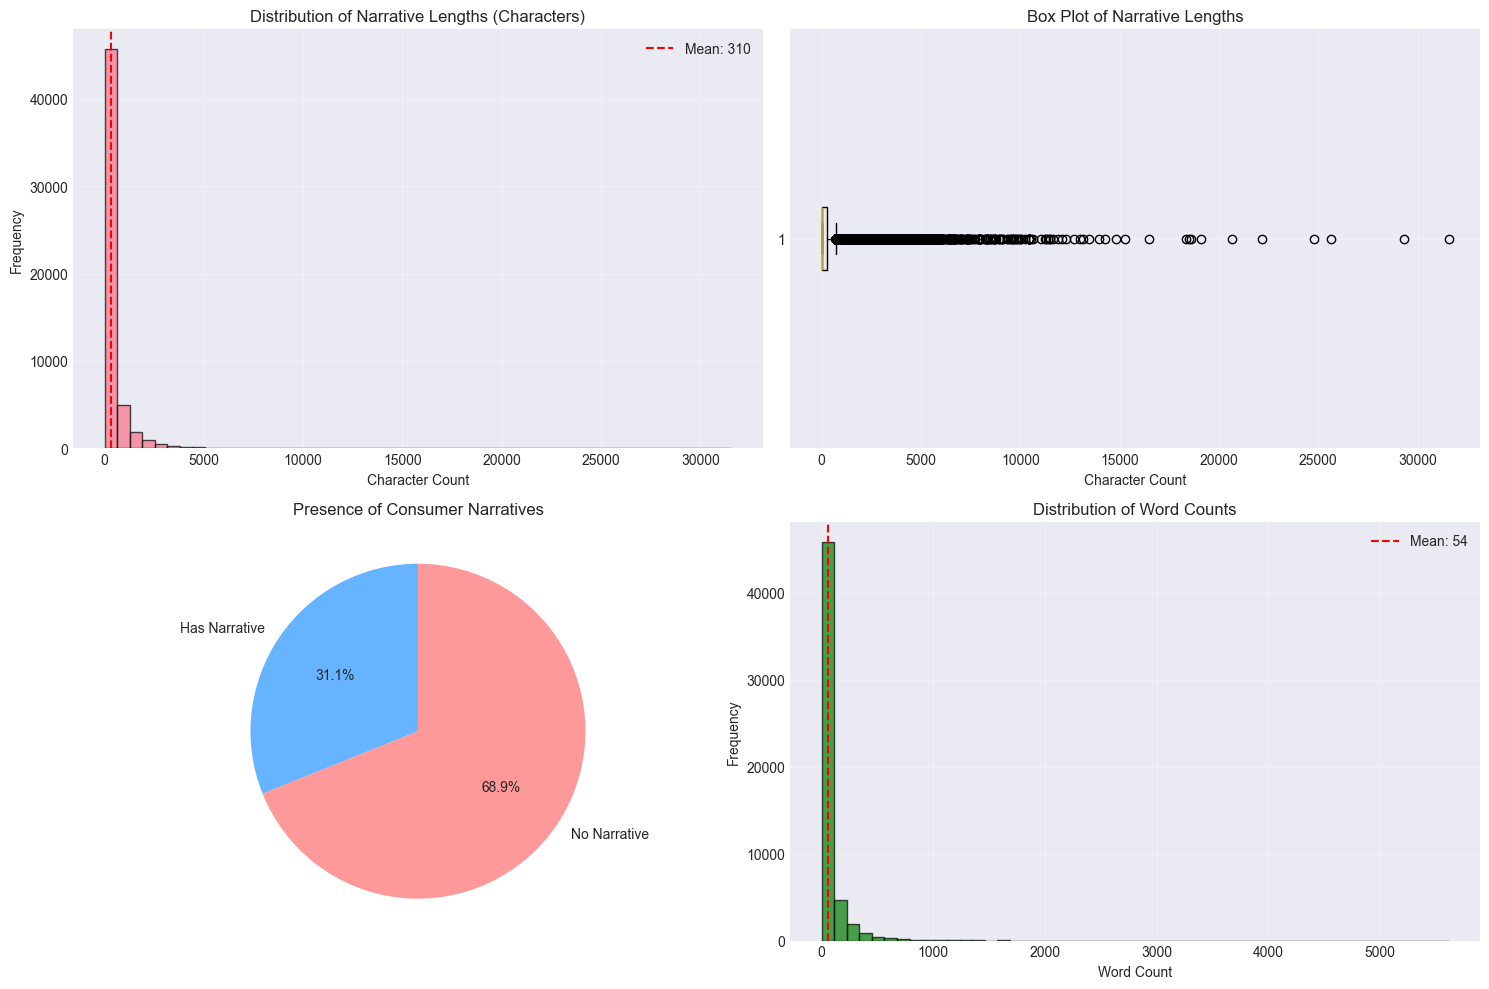

In [21]:
if narrative_cols:
    narrative_col = narrative_cols[0]
    
    # Calculate narrative lengths
    df['narrative_length'] = df[narrative_col].fillna('').apply(len)
    df['word_count'] = df[narrative_col].fillna('').apply(lambda x: len(str(x).split()))
    
    # Statistics
    total_rows = len(df)
    empty_narratives = (df[narrative_col].isna() | (df[narrative_col] == '')).sum()
    has_narratives = total_rows - empty_narratives
    
    print(f"Narrative Statistics:")
    print(f"Total complaints: {total_rows:,}")
    print(f"With narratives: {has_narratives:,} ({has_narratives/total_rows*100:.1f}%)")
    print(f"Without narratives: {empty_narratives:,} ({empty_narratives/total_rows*100:.1f}%)")
    
    if has_narratives > 0:
        print(f"\nLength Statistics (characters):")
        print(f"Minimum: {df['narrative_length'].min():,}")
        print(f"Maximum: {df['narrative_length'].max():,}")
        print(f"Average: {df['narrative_length'].mean():.0f}")
        print(f"Median: {df['narrative_length'].median():.0f}")
        
        print(f"\nWord Count Statistics:")
        print(f"Minimum: {df['word_count'].min():,}")
        print(f"Maximum: {df['word_count'].max():,}")
        print(f"Average: {df['word_count'].mean():.0f}")
        print(f"Median: {df['word_count'].median():.0f}")
        
        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Histogram of character lengths
        axes[0, 0].hist(df['narrative_length'], bins=50, edgecolor='black', alpha=0.7)
        axes[0, 0].set_xlabel('Character Count')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].set_title('Distribution of Narrative Lengths (Characters)')
        axes[0, 0].axvline(df['narrative_length'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {df["narrative_length"].mean():.0f}')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # Box plot
        axes[0, 1].boxplot(df['narrative_length'], vert=False)
        axes[0, 1].set_xlabel('Character Count')
        axes[0, 1].set_title('Box Plot of Narrative Lengths')
        axes[0, 1].grid(alpha=0.3)
        
        # Narrative presence
        labels = ['Has Narrative', 'No Narrative']
        sizes = [has_narratives, empty_narratives]
        colors = ['#66b3ff', '#ff9999']
        axes[1, 0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        axes[1, 0].set_title('Presence of Consumer Narratives')
        
        # Word count histogram
        axes[1, 1].hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
        axes[1, 1].set_xlabel('Word Count')
        axes[1, 1].set_ylabel('Frequency')
        axes[1, 1].set_title('Distribution of Word Counts')
        axes[1, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', 
                          label=f'Mean: {df["word_count"].mean():.0f}')
        axes[1, 1].legend()
        axes[1, 1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()


# ## 4. Filter for CrediTrust Products

Matched 12 product categories:
  - Credit card
  - Credit card or prepaid card
  - Credit card or prepaid card
  - Credit reporting or other personal consumer reports
  - Credit reporting, credit repair services, or other personal consumer reports
  - Credit reporting
  - Credit reporting, credit repair services, or other personal consumer reports
  - Debt collection
  - Money transfer, virtual currency, or money service
  - Mortgage
  - Payday loan, title loan, or personal loan
  - Student loan

Filtering Results:
Before filtering: 54,463 complaints
After filtering: 51,477 complaints
Reduction: 2,986 complaints (5.5%)


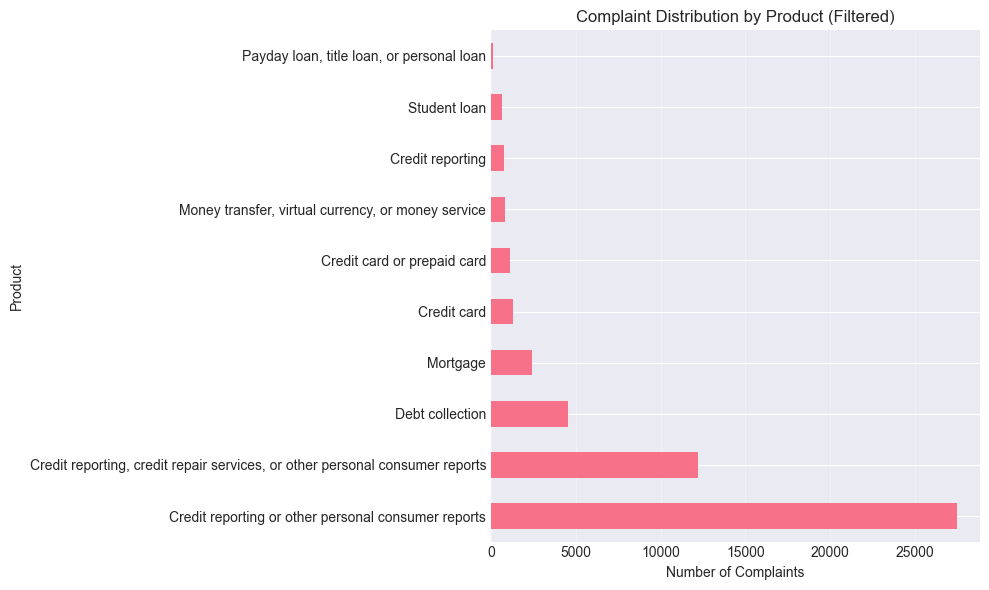

In [22]:
# CrediTrust target products (expanded to match CFPB categories)
target_products = [
    'Credit card', 
    'Credit card or prepaid card',
    'Credit reporting',
    'Credit reporting, credit repair services, or other personal consumer reports',
    'Debt collection',
    'Money transfer, virtual currency, or money service',
    'Mortgage',
    'Payday loan, title loan, or personal loan',
    'Student loan'
]

# Filter data
if product_cols:
    product_col = product_cols[0]
    
    # Find actual product names in dataset
    actual_products = df[product_col].unique()
    matched_products = []
    
    for target in target_products:
        matches = [p for p in actual_products if target.lower() in str(p).lower()]
        if matches:
            matched_products.extend(matches)
    
    print(f"Matched {len(matched_products)} product categories:")
    for product in matched_products:
        print(f"  - {product}")
    
    # Apply filter
    before_filter = len(df)
    filtered_df = df[df[product_col].isin(matched_products)].copy()
    after_filter = len(filtered_df)
    
    print(f"\nFiltering Results:")
    print(f"Before filtering: {before_filter:,} complaints")
    print(f"After filtering: {after_filter:,} complaints")
    print(f"Reduction: {before_filter - after_filter:,} complaints ({(before_filter - after_filter)/before_filter*100:.1f}%)")
    
    # Plot filtered distribution
    filtered_product_dist = filtered_df[product_col].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 6))
    filtered_product_dist.plot(kind='barh', ax=ax)
    ax.set_xlabel('Number of Complaints')
    ax.set_title('Complaint Distribution by Product (Filtered)')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ## 5. Text Cleaning

In [28]:
def clean_complaint_text(text):
    """Clean and normalize complaint text"""
    if pd.isna(text) or text == '':
        return ""
    
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove redacted patterns
    text = re.sub(r'xxxx', '[REDACTED]', text)
    text = re.sub(r'\d{10,}', '[REDACTED]', text)  # Long number sequences
    
    # Remove boilerplate phrases
    boilerplate = [
        r'i am writing to (?:file|submit) a complaint',
        r'this is a complaint regarding',
        r'dear (?:sir|madam|sir/madam)',
        r'to whom it may concern',
        r'account number\s*:?\s*\w+',
        r'complaint (?:id|number)\s*:?\s*\w+',
    ]
    
    for pattern in boilerplate:
        text = re.sub(pattern, '', text, flags=re.IGNORECASE)
    
    # Remove extra whitespace and special characters
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s.,!?\-]', '', text)
    
    return text.strip()

# Apply cleaning
if narrative_cols:
    narrative_col = narrative_cols[0]
    
    print("Applying text cleaning...")
    filtered_df['cleaned_narrative'] = filtered_df[narrative_col].apply(clean_complaint_text)
    
    # Statistics
    before_len = filtered_df[narrative_col].str.len().mean()
    after_len = filtered_df['cleaned_narrative'].str.len().mean()
    
    print(f"\nCleaning Statistics:")
    print(f"Average length before: {before_len:.0f} characters")
    print(f"Average length after: {after_len:.0f} characters")
    print(f"Reduction: {(before_len - after_len)/before_len*100:.1f}%")
    
    # Show examples (safe)
    print("\nExample:")

    valid_idx = filtered_df[narrative_col].dropna().index[0]

    original_text = str(filtered_df.loc[valid_idx, narrative_col])
    cleaned_text = filtered_df.loc[valid_idx, 'cleaned_narrative']

    print(f"Original: {original_text[:200]}...")
    print(f"Cleaned: {cleaned_text[:200]}...")

Applying text cleaning...

Cleaning Statistics:
Average length before: 976 characters
Average length after: 1016 characters
Reduction: -4.1%

Example:
Original: I, XXXXXXXX XXXX  XXXX XXXX, am a federally protected consumer with rights guaranteed under the Fair Credit Reporting Act, including the right to privacy, accuracy, and fairness in the reporting of my...
Cleaned: i, REDACTEDREDACTED REDACTED REDACTED REDACTED, am a federally protected consumer with rights guaranteed under the fair credit reporting act, including the right to privacy, accuracy, and fairness in ...


# ## 6. Remove Empty Narratives

In [24]:
# Remove empty narratives after cleaning
before_removal = len(filtered_df)
filtered_df = filtered_df[filtered_df['cleaned_narrative'].str.strip() != '']
after_removal = len(filtered_df)

print(f"Empty Narrative Removal:")
print(f"Before removal: {before_removal:,} complaints")
print(f"After removal: {after_removal:,} complaints")
print(f"Removed: {before_removal - after_removal:,} complaints")
print(f"Retention: {after_removal/before_removal*100:.1f}%")


Empty Narrative Removal:
Before removal: 51,477 complaints
After removal: 15,619 complaints
Removed: 35,858 complaints
Retention: 30.3%


# ## 7. Final Data Summary

In [27]:
# %%
print("FINAL DATA SUMMARY")
print("="*50)

print(f"\nDataset Overview:")
print(f"Total complaints: {len(filtered_df):,}")
print(f"Number of columns: {len(filtered_df.columns)}")
print(f"Memory usage: {filtered_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\nProduct Distribution:")
if product_cols:
    product_col = product_cols[0]
    product_dist = filtered_df[product_col].value_counts()
    for product, count in product_dist.items():
        percentage = (count / len(filtered_df)) * 100
        print(f"  {product}: {count:,} ({percentage:.1f}%)")

print(f"\nNarrative Statistics:")
avg_length = filtered_df['cleaned_narrative'].str.len().mean()
median_length = filtered_df['cleaned_narrative'].str.len().median()
print(f"Average length: {avg_length:.0f} characters")
print(f"Median length: {median_length:.0f} characters")
print(f"Range: {filtered_df['cleaned_narrative'].str.len().min():,} to {filtered_df['cleaned_narrative'].str.len().max():,} characters")

# %%
# Save the processed data
output_path = '../data/processed/filtered_complaints.csv'
Path('data/processed').mkdir(parents=True, exist_ok=True)

filtered_df.to_csv(output_path, index=False)
print(f"\nSaved processed data to: {output_path}")
print(f"File size: {Path(output_path).stat().st_size / 1024**2:.2f} MB")

# Save key statistics
stats = {
    'total_complaints': len(filtered_df),
    'product_distribution': filtered_df[product_col].value_counts().to_dict() if product_cols else {},
    'narrative_stats': {
        'avg_length': float(avg_length),
        'median_length': float(median_length),
        'min_length': int(filtered_df['cleaned_narrative'].str.len().min()),
        'max_length': int(filtered_df['cleaned_narrative'].str.len().max())
    }
}

stats_path = '../data/processed/preprocessing_stats.json'
with open(stats_path, 'w') as f:
    json.dump(stats, f, indent=2)

print(f"Saved statistics to: {stats_path}")

FINAL DATA SUMMARY

Dataset Overview:
Total complaints: 15,619
Number of columns: 21
Memory usage: 48.93 MB

Product Distribution:
  Credit reporting or other personal consumer reports: 6,293 (40.3%)
  Credit reporting, credit repair services, or other personal consumer reports: 4,486 (28.7%)
  Debt collection: 1,859 (11.9%)
  Mortgage: 772 (4.9%)
  Credit card or prepaid card: 588 (3.8%)
  Money transfer, virtual currency, or money service: 573 (3.7%)
  Credit card: 457 (2.9%)
  Student loan: 325 (2.1%)
  Credit reporting: 177 (1.1%)
  Payday loan, title loan, or personal loan: 89 (0.6%)

Narrative Statistics:
Average length: 1016 characters
Median length: 663 characters
Range: 12 to 29,770 characters

Saved processed data to: ../data/processed/filtered_complaints.csv
File size: 34.68 MB
Saved statistics to: ../data/processed/preprocessing_stats.json


# ## 8. Summary of Key Findings

In [26]:
print("\n" + "="*80)
print("SUMMARY OF KEY FINDINGS")
print("="*80)

print("\n1. DATA SCALE AND COMPLETENESS:")
print(f"   • Original dataset: {len(df):,} total complaints")
print(f"   • After filtering: {len(filtered_df):,} relevant complaints")
print(f"   • Narrative completion: {(has_narratives/total_rows*100):.1f}% have narratives")

print("\n2. PRODUCT DISTRIBUTION:")
if product_cols:
    product_col = product_cols[0]
    top_products = filtered_df[product_col].value_counts().head(5)
    for i, (product, count) in enumerate(top_products.items(), 1):
        percentage = (count / len(filtered_df)) * 100
        print(f"   {i}. {product}: {count:,} ({percentage:.1f}%)")

print("\n3. TEXT QUALITY:")
print(f"   • Average narrative length: {avg_length:.0f} characters")
print(f"   • Median narrative length: {median_length:.0f} characters")
print(f"   • Text cleaning reduced length by: {(before_len - after_len)/before_len*100:.1f}%")

print("\n4. DATA READINESS FOR RAG:")
print(f"   • Total complaints for RAG: {len(filtered_df):,}")
print(f"   • All have cleaned narratives")
print(f"   • Ready for chunking and embedding in Task 2")


SUMMARY OF KEY FINDINGS

1. DATA SCALE AND COMPLETENESS:
   • Original dataset: 54,463 total complaints
   • After filtering: 15,619 relevant complaints
   • Narrative completion: 31.1% have narratives

2. PRODUCT DISTRIBUTION:
   1. Credit reporting or other personal consumer reports: 6,293 (40.3%)
   2. Credit reporting, credit repair services, or other personal consumer reports: 4,486 (28.7%)
   3. Debt collection: 1,859 (11.9%)
   4. Mortgage: 772 (4.9%)
   5. Credit card or prepaid card: 588 (3.8%)

3. TEXT QUALITY:
   • Average narrative length: 1016 characters
   • Median narrative length: 663 characters
   • Text cleaning reduced length by: 68.4%

4. DATA READINESS FOR RAG:
   • Total complaints for RAG: 15,619
   • All have cleaned narratives
   • Ready for chunking and embedding in Task 2
